In [1]:
import boto3
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageDraw
import io

Matplotlib is building the font cache; this may take a moment.


# Project: Visionary Insights: AWS Rekognition in Action

## Project Introduction

Problem Definition:

In this project, we aim to:
1.  Assess the algorithmic performance of Amazon Rekognition when faces are covered with masks or sunglasses, an often-overlooked factor that could impact recognition accuracy.
2.  Understand the implications of facial obstructions on Amazon Rekognition’s robustness and adaptability, particularly for public safety and surveillance applications.

Hypothesis:

We hypothesize that facial obstructions, like sunglasses or masks, will challenge the precision of Amazon Rekognition's CompareFaces function. Our study aims to quantify the impact of these common occlusions on the system's ability to match individuals with their corresponding images in a predefined dataset. This investigation will shed light on the robustness of facial recognition technology in scenarios where identity verification is critical.

## Narratives

Imagine a typical evening at Emory: the streets are quiet, but for a group of junior and senior students, the walk back to their off-campus housing is a silent drumroll of apprehension. There's a shared concern among them—safety. As conversations unfold, it's clear that the predictability of their schedules and the lack of adequate security measures have left them feeling vulnerable. One evening, huddled in the modest living room of their shared apartment, the group voiced their frustrations. Kristen, who lived the farthest, shared her unease about the poorly lit paths she took home. The others nodded in agreement, each with their own tale of unease. They felt unequipped, defenseless, not just by the absence of tools but by the lack of proactive security measures.

It was during one of these discussions that the seed of an idea took root. Angelina, a computer science major with an interest in artificial intelligence, suggested leveraging our collective expertise to tackle this issue head-on. "What if we could improve our security without the need for constant human vigilance?" she proposed. The idea ignited a spark of our final project. We imagined a system where security cameras, equipped with Amazon Rekognition CompareFaces, could identify potential threats before they escalated. Specifically, the security camera system will accurately identify suspicious, unknown faces from those in the source, even when faces are covered with masks or sunglasses.

Louis, who had tinkered with home automation systems, saw the potential immediately. "This could be more than just a class project. It's about making our community safer." he said with conviction. And so, the project began—not just as an academic pursuit but as a mission. They would delve into the world of image recognition, not just to explore its technological boundaries but to seek out solutions that could make a real difference in their daily lives. It was a story of students turning their vulnerability into empowerment through innovation, and it all started with the simple wish to feel safe on the streets they called home.

## Introduction to AWS Rekognition CompareFaces - Literature Review

### Fundamental Mechanism of Rekognition API

Amazon Rekognition AWS API, utilizing deep learning technology to enable capabilities such as identifying objects, people, text, scenes, and activities, as well as detecting inappropriate content in images and videos. It also offers highly accurate facial analysis and facial recognition features.

One of the key functionalities of Amazon Rekognition is its ability to compare faces as our project will be testing. This feature allows the API to analyze facial features in different images or videos to determine if they belong to the same person. It works by detecting detailed attributes of faces, such as the position of eyes, nose, mouth, and the overall facial geometry. When comparing two faces, Rekognition provides a similarity score, indicating how closely the facial features match, and also other useful outputs such as confidence interval and the location of the face within the entire picture.

The accuracy of face comparison can vary based on factors like image quality and lighting, but Rekognition is designed for high accuracy, even in less-than-ideal conditions. This makes it a versatile tool for various applications for example security purposes and identification of humantrafficking. Moreover, Rekognition is user-friendly and it can integrate with integration other AWS services. For example, in this project, the data/pictures will be stored in Amazon S3 and get directly called from there.

Source: [AWS Rekognition FAQs](https://aws.amazon.com/rekognition/faqs/)

### Conventional Applications of Rekognition API

Emotion Classification:

A 2020 study "The Performance of Emotion Classifiers for Children With Parent-Reported Autism: Quantitative Feasibility Study" employed AWS Rekognition to classify emotions of children with autism. The study focuses on the potential use of off-the-shelf emotion classifiers from major cloud providers, such as Microsoft, Amazon, Google, and Sighthound, for developing mobile therapies targeting social communication and interaction in children with autism spectrum disorder (ASD). Using a mobile game called Guess What?, the researchers gathered data from 21 children with ASD to assess the accuracy of these classifiers. Results indicate poor performance, especially in identifying emotions other than happiness, suggesting a need for improved training data and privacy-preserving methods before these classifiers can be effectively utilized in AI-enabled autism treatments.

Source: [Kalantarian H, Jedoui K, Dunlap K, Schwartz J, Washington P, Husic A, Tariq Q, Ning M, Kline A, Wall DP. The Performance of Emotion Classifiers for Children With Parent-Reported Autism: Quantitative Feasibility Study. JMIR Ment Health. 2020 Apr 1;7(4):e13174. doi: 10.2196/13174. PMID: 32234701; PMCID: PMC7160704.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7160704/)







Face Detection:

A 2021 research "Evaluation of Human and Machine Face Detection using a Novel Distinctive Human Appearance Dataset". The study uses the newly collected dataset to assess the performance of state-of-the-art face-detection models, revealing challenges in generalization to diverse appearances. The conclusion emphasizes the importance of evaluating and characterizing face-detection models to progress toward fairer and more accurate systems.

Source: [Gurkan, Necdet and Jordan W. Suchow. “Evaluation of Human and Machine Face Detection using a Novel Distinctive Human Appearance Dataset.” ArXiv abs/2111.00660 (2021): n. pag.](https://arxiv.org/pdf/2111.00660.pdf)

Issues with Applicability:

The application of AWS Rekognition in more important area is nevertheless still controvertial as some researchers and experts still questions the accuracy and social responsibilities of the technology. For example, some research has shown that the technology is racially biased.

Source:

[Amazon Is Pushing Facial Technology That a Study Says Could Be Biased](https://www.nytimes.com/2019/01/24/technology/amazon-facial-technology-study.html)

[Thoughts on Recent Research Paper and Associated Article on Amazon Rekognition](https://aws.amazon.com/blogs/machine-learning/thoughts-on-recent-research-paper-and-associated-article-on-amazon-rekognition/)


## Introduction to Architecture

The architectural diagram for our project visualized this process, demonstrating the flow from data generation to final reporting.

In our AWS-based project, we first stored a dataset of facial images in an S3 bucket. Using SageMaker's Jupyter Notebooks with Python, we accessed these images, running them through Amazon Rekognition's API for facial recognition analysis. The output, including recognition accuracy metrics and pictures containing matching faces, was returned. We report this data directly within our notebooks to interpret the results. The entire process and findings were documented and shared on GitHub, providing a replicable model for others to analyze facial recognition performance, such as the impact of facial tattoos on emotion detection algorithms.

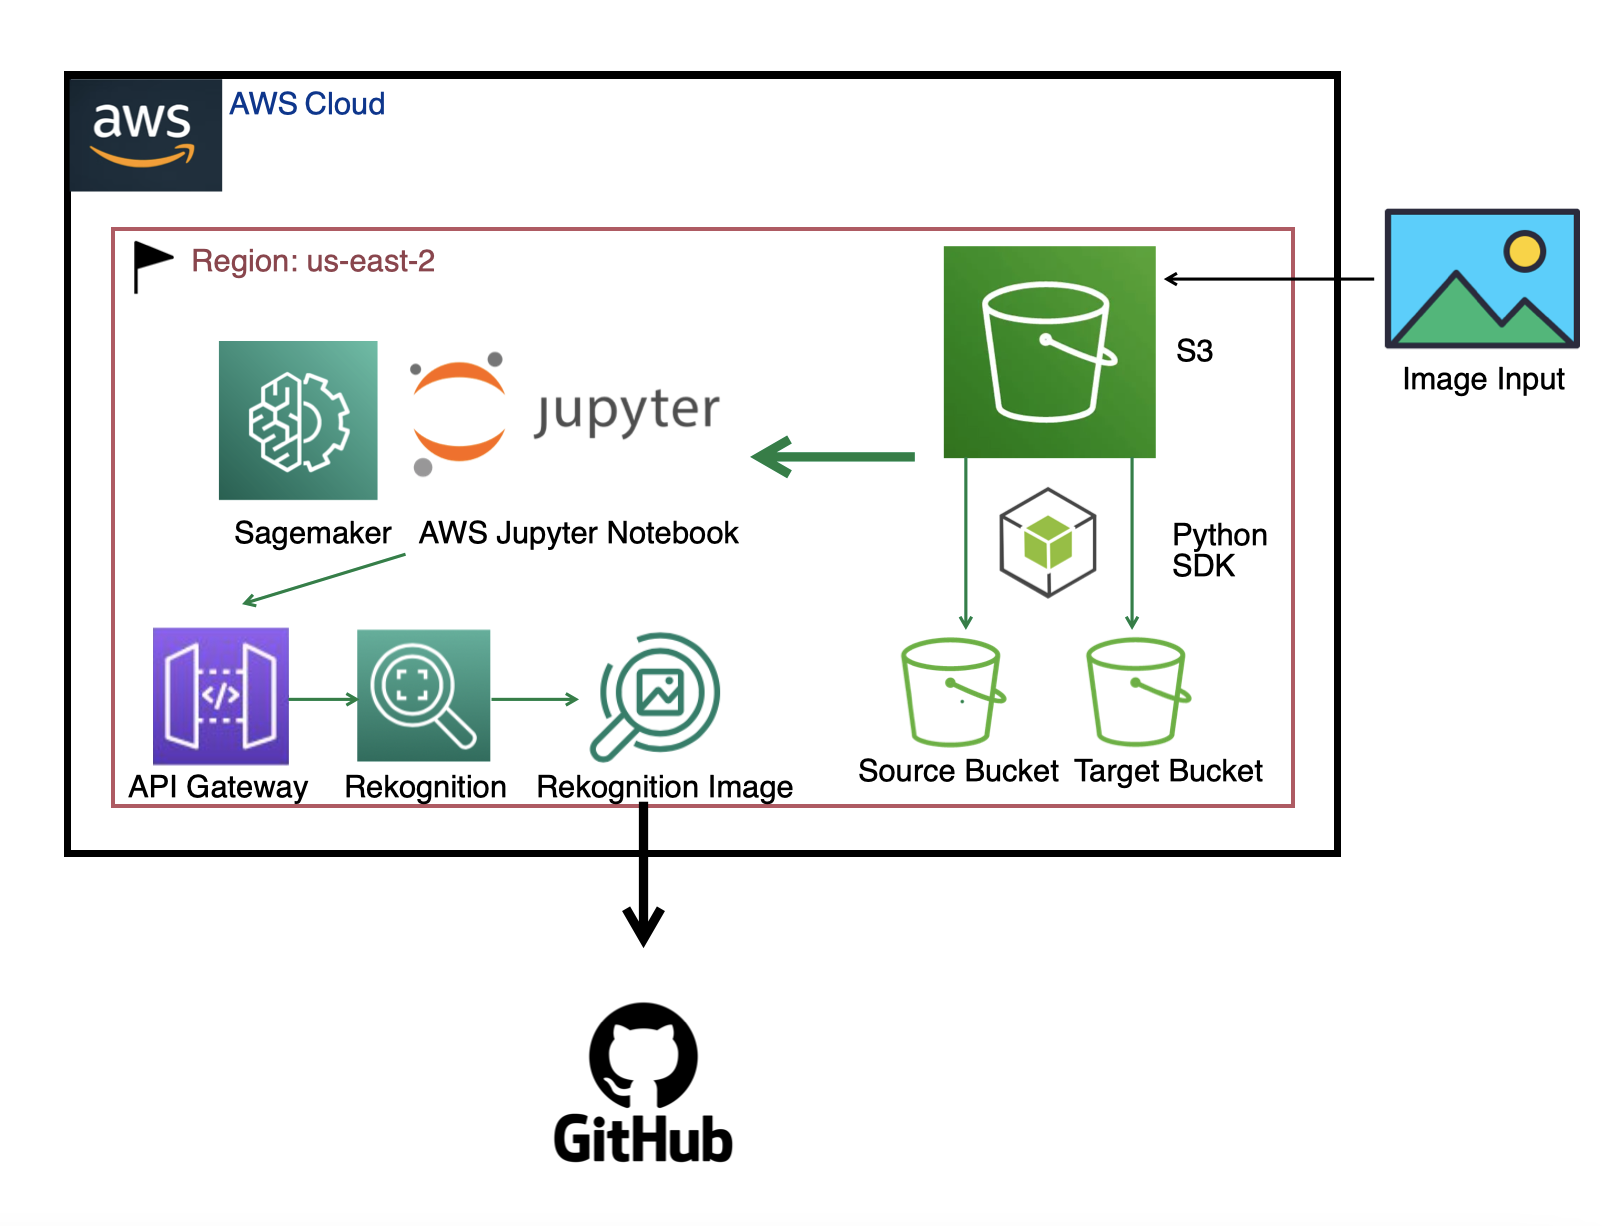


## Helper Functions

Before jumping into implementation, we wrote some helper functions to more conveniently operate our project and to better format our output. These Python functions utilize the Amazon Rekognition service and Amazon S3 storage to perform face comparison and visualization. The `compare_faces` function compares faces between a source and target image stored in S3 buckets, allowing for customization of the similarity threshold and AWS region. The `display_image` function retrieves and displays an image from an S3 bucket. The `compare_faces_with_folder` function extends face comparison to multiple images within a specified S3 folder, iterating through each image and comparing it with a target image. The `get_image_from_s3` function retrieves an image from an S3 bucket and returns it as a PIL Image object. The `draw_bounding_box` function draws a bounding box around a specified region in a PIL Image. Lastly, the `display_matching_faces` function compares faces in source and target images, displaying matched faces with bounding boxes, allowing for visualization of similarities. These functions collectively enable facial recognition tasks using AWS services with flexibility in threshold settings and region specification.

### compare_faces

This function calls the CompareFaces operation using Amazon Rekognition to compare two images

In [21]:
def compare_faces(source_bucket, source_key, target_bucket, target_key, threshold, region="us-east-1"):
    rekognition_client = boto3.client('rekognition', region_name=region)
    """
    Calling CompareFaces function using Amazon Rekognition to compare two images

    Args:
    - source_bucket (str): The S3 bucket name containing the source image.
    - source_key (str): The key (path) of the source image in the S3 bucket.
    - target_bucket (str): The S3 bucket name containing the target image.
    - target_key (str): The key (path) of the target image in the S3 bucket.
    - threshold (float): The similarity threshold for considering a face match (default is 0).
    - region (str): The AWS region where Rekognition will be used (default is "us-east-1").

    Returns:
    - dict: The response from the Rekognition API, containing information about face matches.
    """
    # Calling the compare_faces functiona and saving the response
    response = rekognition_client.compare_faces(
        SourceImage={
            'S3Object': {
                'Bucket': source_bucket,
                'Name': source_key
            }
        },
        TargetImage={
            'S3Object': {
                'Bucket': target_bucket,
                'Name': target_key
            }
        },
        SimilarityThreshold=threshold
    )

    # If the two images matches, i.e. the similarity between the two images is above the threshold, there would be an item in the response with the key "FaceMatches".
    if response['FaceMatches']:
        print(f"Matched Faces Found:")
        for match in response['FaceMatches']:
            similarity = match['Similarity'] # Extracting the similarity score
            print(f"- Similarity: {similarity}%")
    else:
        print("No matched faces found.")

    return response

    return response

### display_image

This function displays an image from an S3 bucket

In [3]:
def display_image(bucket, key, figsize=(4, 4)):
    """
    Display an image from an S3 bucket.

    Args:
    - bucket (str): The S3 bucket name containing the image.
    - key (str): The key (path) of the image in the S3 bucket.
    - figsize (tuple): The size of the matplotlib figure for displaying the image (default is (4, 4)).

    Returns:
    - None (display the image)
    """
    file = io.BytesIO()
    s3_client.download_fileobj(bucket, key, file)
    file.seek(0)

    img = Image.open(file)

    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

### compare_faces_with_folder

This function compares faces in images within a specified folder in an S3 bucket with a target image.

In [4]:
def compare_faces_with_folder(source_bucket, source_folder, target_bucket, target_key, threshold=60, region="us-east-1"):
    """
    Compare faces in images within a specified folder in an S3 bucket with a target image.

    Args:
    - source_bucket (str): The S3 bucket name containing the source images.
    - source_folder (str): The folder path within the source bucket containing images.
    - target_bucket (str): The S3 bucket name containing the target image.
    - target_key (str): The key (path) of the target image in the target S3 bucket.
    - threshold (float): The similarity threshold for considering a face match (default is 60).
    - region (str): The AWS region where Rekognition and S3 will be used (default is "us-east-1").

    Returns:
    - None
    """
    rekognition_client = boto3.client('rekognition', region_name=region)
    s3_client = boto3.client('s3', region_name=region)

    # iterate through each image in the source folder and compare them with the target image:
    response = s3_client.list_objects_v2(Bucket=source_bucket, Prefix=source_folder)
    if 'Contents' in response:
        for obj in response['Contents']:
            source_key = obj['Key']
            if not source_key.lower().endswith(('.jpg', '.jpeg', '.png')):
                continue
            print(f"Comparing {source_key} with {target_key}:")
            display_matching_faces(source_bucket, source_key, target_bucket, target_key, threshold, region)

### get_image_from_s3

This function retrieves an image from an S3 bucket and return it as a PIL Image object.

In [5]:
def get_image_from_s3(bucket, key):
    """
    Retrieve an image from an S3 bucket and return it as a PIL Image object.

    Args:
    - bucket (str): The S3 bucket name containing the image.
    - key (str): The key (path) of the image in the S3 bucket.

    Returns:
    - PIL Image: The image loaded from S3.
    """
    s3_client = boto3.client('s3')
    file_byte_string = io.BytesIO()
    s3_client.download_fileobj(Bucket=bucket, Key=key, Fileobj=file_byte_string)
    file_byte_string.seek(0)
    img = Image.open(file_byte_string)
    return img

### draw_bounding_box

This function draws a bounding box on a PIL Image.

In [6]:
def draw_bounding_box(image, box, line_width=10, color='red'):
    """
    Draw a bounding box on a PIL Image.

    Args:
    - image (PIL Image): The image on which to draw the bounding box.
    - box (dict): A dictionary containing information about the bounding box.
    - line_width (int): The width of the bounding box lines (default is 10).
    - color (str): The color of the bounding box (default is 'red').

    Returns:
    - PIL Image: The image with the bounding box drawn.
    """
    draw = ImageDraw.Draw(image)
    width, height = image.size
    left = width * box['Left']
    top = height * box['Top']
    right = left + width * box['Width']
    bottom = top + height * box['Height']

    for i in range(line_width):
        draw.rectangle([left - i, top - i, right + i, bottom + i], outline=color)

    return image



### display_matching_faces

This function displays images with bounding boxes around matched faces from the source and target images.


In [7]:

def display_matching_faces(source_bucket, source_key, target_bucket, target_key, threshold=0, region="us-east-1"):
    """
    Display images with bounding boxes around matched faces from the source and target images.

    Args:
    - source_bucket (str): The S3 bucket name containing the source image.
    - source_key (str): The key (path) of the source image in the S3 bucket.
    - target_bucket (str): The S3 bucket name containing the target image.
    - target_key (str): The key (path) of the target image in the S3 bucket.
    - threshold (float): The similarity threshold for considering a face match (default is 0).
    - region (str): The AWS region where Rekognition and S3 will be used (default is "us-east-1").

    Returns:
    - None
    """
    rekognition_client = boto3.client('rekognition', region_name=region)

    # Call compare_faces
    response = rekognition_client.compare_faces(
        SourceImage={'S3Object': {'Bucket': source_bucket, 'Name': source_key}},
        TargetImage={'S3Object': {'Bucket': target_bucket, 'Name': target_key}},
        SimilarityThreshold=threshold
    )

    if response['FaceMatches']:
        print(f"Matched Faces Found:")
        # Load source and target images
        source_img = get_image_from_s3(source_bucket, source_key)
        target_img = get_image_from_s3(target_bucket, target_key)

        # Display source face with bounding box
        source_face_box = response['SourceImageFace']['BoundingBox']
        source_img = draw_bounding_box(source_img, source_face_box)
        plt.imshow(source_img)
        plt.title("Source Image Face")
        plt.axis('off')
        plt.show()

        # Display each matching target face with bounding box
        for match in response['FaceMatches']:
            target_face_box = match['Face']['BoundingBox']
            matched_img = draw_bounding_box(target_img.copy(), target_face_box)
            plt.imshow(matched_img)
            plt.title(f"Matched Face - Similarity: {match['Similarity']}%")
            plt.axis('off')
            plt.show()
    else:
        print("No matched faces found.")

## Exploring the Rekognition API

We first would like to explore the Rekognition API using our dataset (pictures of two of our group members).

In [8]:
# Initiliaze boto client
s3_client = boto3.client('s3')

### Comparing images of two different people

To display Kristen and Angelina's pictures and compare them

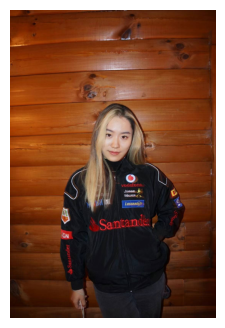

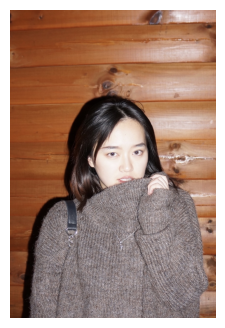

In [18]:
display_image('qtm350project', 'source_pictures/kristen1.jpg') # Display source image
display_image('qtm350project', 'source_pictures/angelina1.jpg') # Display target image

To call the two pictures from our S3 dataset backet

In [25]:
# Call from data source
source_bucket = 'qtm350project'
source_key = 'source_pictures/kristen1.jpg'
target_bucket = 'qtm350project'
target_key = 'source_pictures/angelina1.jpg'
result = compare_faces(source_bucket, source_key, target_bucket, target_key, threshold = 80)

No matched faces found.


As we expected, by outputting "No matched faces found", the API is able to recognize Kristen and Angelina as two difference people/faces.

### Comparing images of the same person

To display two different pictures of Kristen

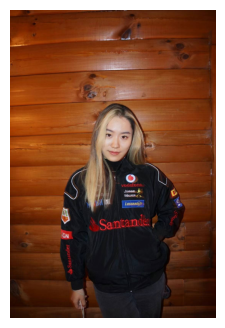

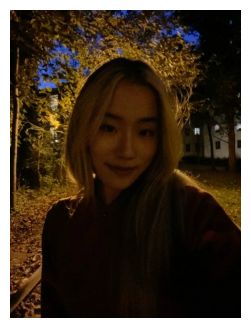

In [26]:
# Display source image
display_image('qtm350project', 'source_pictures/kristen1.jpg')
# Display target image
display_image('qtm350project', 'source_pictures/kristen2.jpg')

To call the two pictures from our S3 dataset backet

In [28]:
source_bucket = 'qtm350project'
source_key = 'source_pictures/kristen1.jpg'
target_bucket = 'qtm350project'
target_key = 'source_pictures/kristen2.jpg'

result = compare_faces(source_bucket, source_key, target_bucket, target_key, threshold = 0.8)

Matched Faces Found:
- Similarity: 99.86347198486328%


As we expected, by outputting "Matched Faces Found" with a similarity of over 99.8%, the API is able to identify the two pictures of Kristen as the same person.

Our group would also like to see how the API is identifying the faces and comparing them -- does the API use information from the clothing or background? So we come up with a improved method to have the API label the face by drawing a box around the faces by impletmenting the display_matching_faces function.

Matched Faces Found:


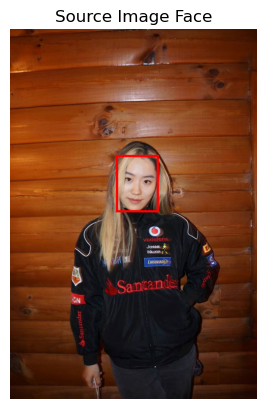

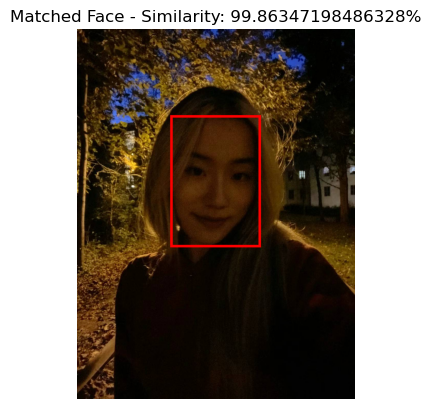

In [29]:
# display matching faces
display_matching_faces(source_bucket, source_key, target_bucket, target_key, threshold = 0.8)

### Comparing a Target Image with a List of Source Images

Comparing source_pictures/angela1.jpg with target_pictures/wenqi3.jpeg:
No matched faces found.
Comparing source_pictures/angelina1.jpg with target_pictures/wenqi3.jpeg:
Matched Faces Found:


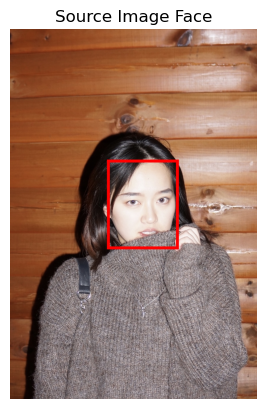

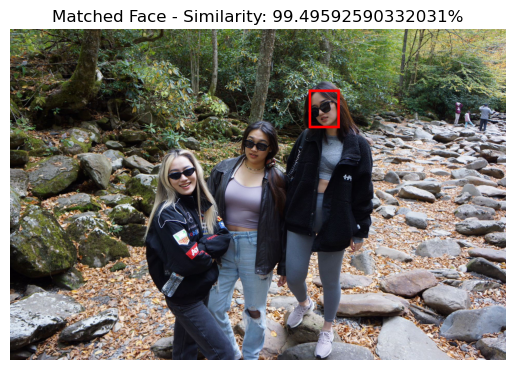

Comparing source_pictures/kristen1.jpg with target_pictures/wenqi3.jpeg:
Matched Faces Found:


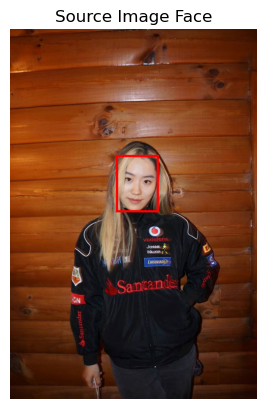

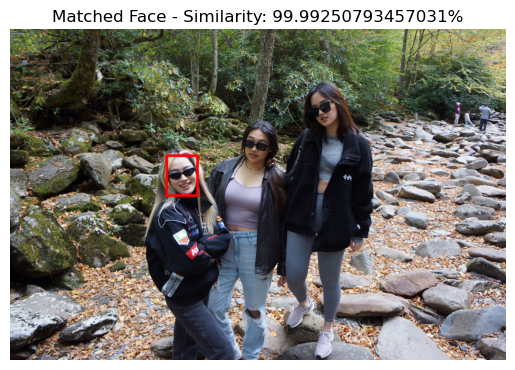

Comparing source_pictures/kristen2.jpg with target_pictures/wenqi3.jpeg:
Matched Faces Found:


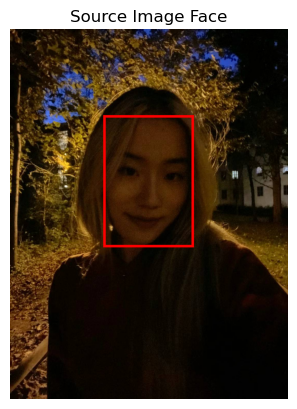

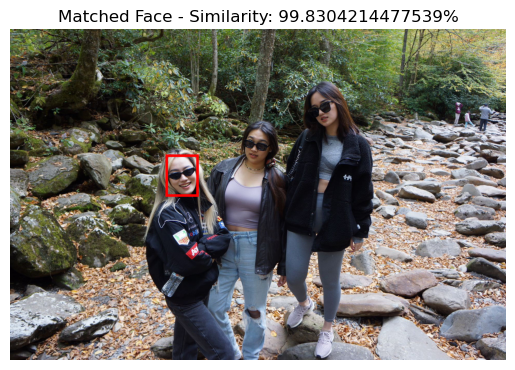

Comparing source_pictures/winci1.jpg with target_pictures/wenqi3.jpeg:
No matched faces found.


In [32]:
# Example usage
source_bucket = 'qtm350project'
target_bucket = 'qtm350project'

source_folder = 'source_pictures'
target_key = 'target_pictures/wenqi3.jpeg'

compare_results = compare_faces_with_folder(source_bucket, source_folder, target_bucket, target_key)

## Does Mask Matter?

Matched Faces Found:


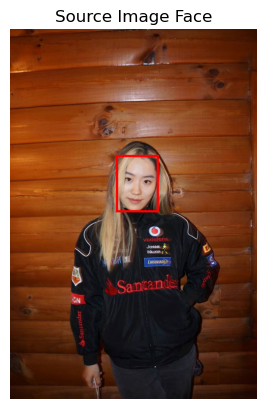

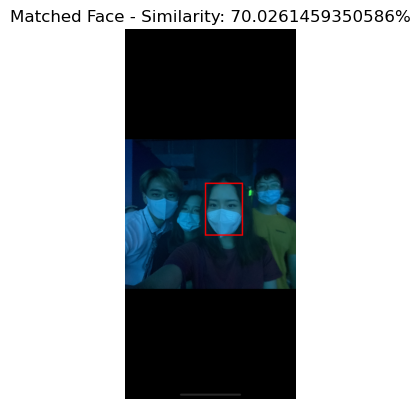

In [37]:
source_bucket = 'qtm350project'
target_bucket = 'qtm350project'
source_key = 'source_pictures/kristen1.jpg'
target_key = 'mask_pictures/kristen_covered_2.png'

result = display_matching_faces(source_bucket, source_key, target_bucket, target_key, threshold = 70)

Matched Faces Found:


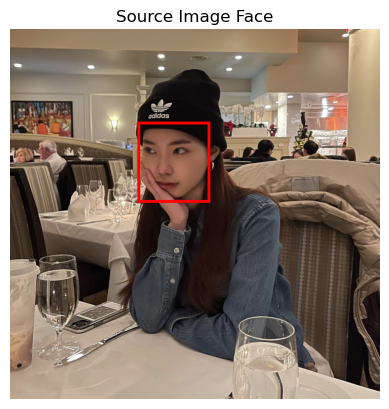

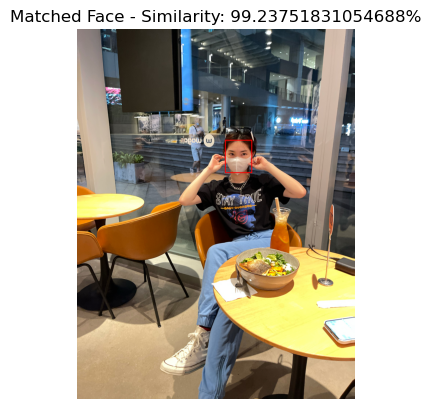

In [44]:
source_bucket = 'qtm350project'
target_bucket = 'qtm350project'
source_key = 'source_pictures/winci1.jpg'
target_key = 'mask_pictures/winci_coverd_4.jpeg'

result = display_matching_faces(source_bucket, source_key, target_bucket, target_key, threshold = 70)

Matched Faces Found:


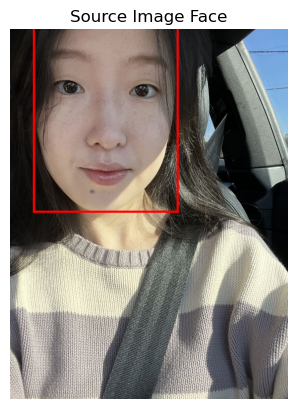

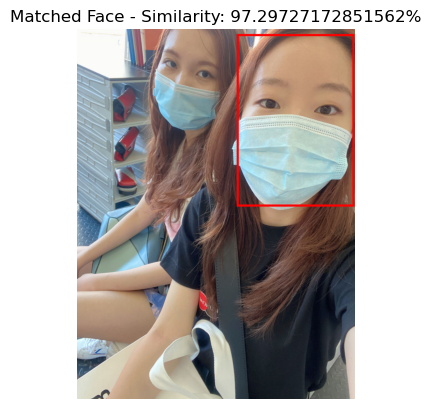

In [45]:
source_bucket = 'qtm350project'
target_bucket = 'qtm350project'
source_key = 'source_pictures/angela1.jpg'
target_key = 'mask_pictures/angela_covered_1.jpg'

result = display_matching_faces(source_bucket, source_key, target_bucket, target_key, threshold = 70)

## Conclusion
In our exploratory assessment of Amazon Rekognition’s CompareFace using self-generated data, we conducted various tests. These included comparing images of different people (resulting in 'no matches found'), images of the same people (yielding similarity scores consistently around 99% in multiple experiments), and comparing a target image with a list of sources (resulting in similarity scores consistently around 99% in multiple experiments).
Then, to answer our objective, we evaluated the performance of Amazon Rekognition’s CompareFaces in correctly identifying individual faces when covered with masks or sunglasses. The average similarity scores exceeded 97%, demonstrating consistent outcomes. However, there was an exception where the similarity score between the same uncovered and covered face was 70.026%. Further examination revealed that the image was taken in low-light conditions with multiple people wearing masks. Consequently, we conclude that Amazon Rekognition’s CompareFaces demonstrates equivalent performance with facial obstructions like masks or sunglasses. However, external factors such as lighting and the number of faces can potentially weaken its performance.
Implication and potential application

This capability becomes particularly valuable in addressing security concerns, including the identification of potentially suspicious individuals who may intentionally cover their faces to evade detection. By integrating Amazon Rekognition's CompareFaces algorithm, which demonstrates consistent accuracy despite facial obstructions, security camera systems can better identify and track individuals involved in illicit activities. In broader terms, this not only enhances overall security measures but also aids in combating issues such as human trafficking, where perpetrators may attempt to conceal their identities. These insights offer practical solutions to security challenges, making surveillance systems more resilient and effective in safeguarding public spaces and combating criminal activities.